# Sentiment analysis in Python

in this notebook we will be doing some sentiment naalysis in python using two different techniques

* 1. VADER (Valence Aware directory And sEntiment Resoner) - Baf of words approach
* 2. Roberta Pretrained model from 
* 3. Huggingface Pipeline 

In [4]:
# EDA (Exploratory data analysis)

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk

plt.style.use('ggplot')

In [5]:
# Read in data

df= pd.read_csv('Reviews.csv')
df.info

<bound method DataFrame.info of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulness

In [6]:
# here is an example of a review
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
# Let's use undersample the data

In [8]:
df = df.head(500)
df.shape

(500, 10)

# 1 EDA

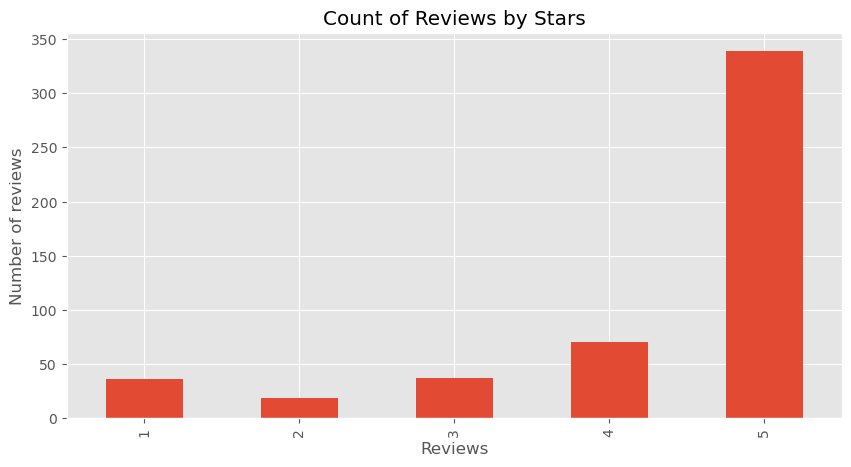

In [9]:
ax= df['Score'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title = 'Count of Reviews by Stars',
          figsize=(10,5));
ax.set_xlabel('Reviews')
ax.set_ylabel('Number of reviews')
plt.show()

In [10]:
example = df['Text'][50]

In [11]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [12]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jihadgarti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [16]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [17]:
nltk.chunk.ne_chunk(tagged)
%pip install svgling

Note: you may need to restart the kernel to use updated packages.


In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

# Step1 : VADER sentiment scoring
we will use NLTK's SentimentIntensityANlayzer to get neg/neu/pos scores of the text 
    * Stop words are removed
    * Each word is cored andf combiened to a total score 

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [21]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [22]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [23]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left',left_index=True, right_index=True)

In [25]:
# Now we have sentiment score and metadata

vaders.head()

,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,0.000,0.695,0.305,0.9441,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.138,0.862,0.000,-0.5664,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.091,0.754,0.155,0.8265,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,0.000,1.000,0.000,0.0000,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
5,0.000,0.552,0.448,0.9468,6.0,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...


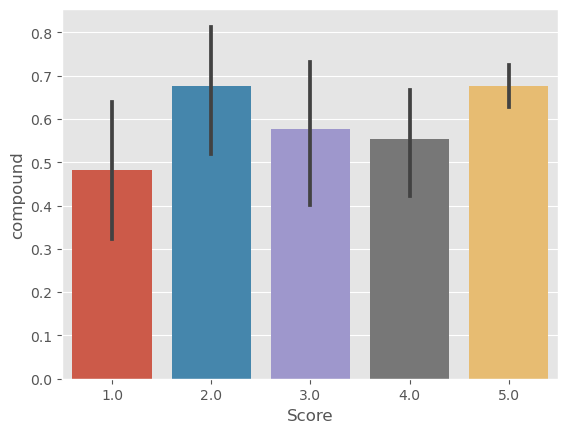

In [26]:
## Plor VADER resultats

sns.barplot(data=vaders, x='Score', y = 'compound')
ax.set_title('Compound score by amazon star reviews')
plt.show()

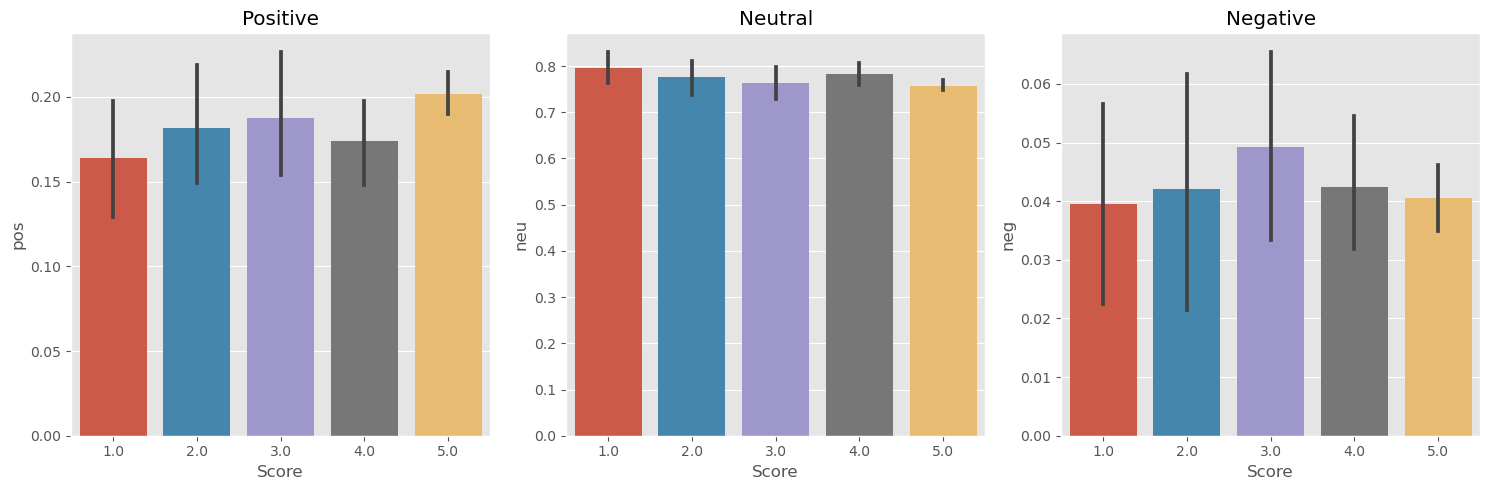

In [27]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data = vaders, x='Score' , y='pos',ax = axs[0])
sns.barplot(data = vaders, x='Score' , y='neu',ax = axs[1])
sns.barplot(data = vaders, x='Score' , y='neg',ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show();

### Step 3. Roberta Pretrained Model

* Use a model trained of a large corpus of data
* Transformer model accounts for the words but also the context related to other words


In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [30]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/jihadgarti/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


/Users/jihadgarti/anaconda3/lib/python3.11/site-packages/transformers/modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file,

In [32]:
# Vader results on example 
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [36]:
# Run for roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.97635514, 0.02068747, 0.00295737], dtype=float32)